<a href="https://colab.research.google.com/github/alexjosesilva/generating-report-for-tabular-data/blob/main/Geracao_de_Energia_por_Matriz_de_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Final - Disciplina - Programação para Deep Learning
Base de dados ANEEL Geração de Energia

In [ ]:
# Primeiro passo instalando as libs
#!pip install -q requests
#!pip install -q import-ipynb
#!pip install cuml-cu11 --extra-index-url=https://pypi.nvidia.com
#!pip install -q joblib

In [ ]:
import warnings,os
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from requests import get as http
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
categorizador = KBinsDiscretizer(n_bins=15, encode='ordinal',strategy='quantile', random_state=42)

In [ ]:
def carrega_df(file_id, base_file):
    #url = 'https://colab.research.google.com/drive/1raw-_IyknnaBdbuhHv-wh-Ay3vyltSSK?usp=sharing'
    #file_name = url.split('/')[-1].split('?')[0]
    file_name = str(file_id)
    url = 'https://drive.google.com/uc?id={file_id}&export=download'.format(file_id=file_name)
    path_name = base_file
    if not os.path.exists(path_name):
        busca = http(url)
        if busca.status_code == 200:
            with open(path_name, 'wb') as f:
                plan = busca.content.decode('iso-8859-1')
                gravar = plan.encode('utf-8')
                f.write(gravar)
    return pd.read_csv(base_file, sep=';', encoding='utf-8')

In [ ]:
aneeldf = carrega_df('1xoftPNgzLFqDgoTJb2sNxWpMjiYoNNld', 'aneel_csv.csv')

In [ ]:
aneeldf

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
0,2025-08-01,E,8,PCH.PH.MG.000008-6.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1400,",00",Não,"-20,12479858","-43,87020250",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CORREGO DO SITIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
1,2025-08-01,F,9,PCH.PH.MG.000009-4.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,3972,",00",Não,"-20,13187300","-43,87693500",2000-07-07,2030-07-07,100% para ANGLOGOLD ASHANTI CORREGO DO SITIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
2,2025-08-01,G,10,PCH.PH.MG.000010-8.1,MG,PCH,Operação,Hídrica,Potencial hidráulico,Autorização,...,1440,",00",Não,"-20,13754468","-43,89192620",2000-08-31,2030-08-31,100% para ANGLOGOLD ASHANTI CORREGO DO SITIO M...,41 - Das Velhas - Sao Francisco,Nova Lima - MG
3,2025-08-01,14 de Julho,12,UHE.PH.RS.000012-4.1,RS,UHE,Operação,Hídrica,Potencial hidráulico,Concessão,...,100000,"45200,00",Não,"-29,06475278","-51,67494167",2001-03-15,2039-11-13,100% para CERAN - COMPANHIA ENERGETICA RIO DAS...,86 - Taquari,"Bento Gonçalves - RS, Cotiporã - RS"
4,2025-08-01,Abaúna,15,CGH.PH.RS.000015-9.1,RS,CGH,Operação,Hídrica,Potencial hidráulico,Registro,...,720,"510,00",Não,"-27,82377500","-52,06999722",NaN,NaN,100% para CRERAL- COOPERATIVA DE GERACAO DE EN...,"72 - Uruguai, Inhanduva, Peixe e outros",Floriano Peixoto - RS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25891,2025-08-01,JJS SOLADOS AUTOPRODUTOR,75597,UFV.RS.SC.075597-4.1,SC,UFV,Operação,Solar,Radiação solar,Registro,...,380,",00",Não,",00000000",",00000000",NaN,NaN,100% para JJS SOLADOS LTDA. (REG),NaN,São João Batista - SC
25892,2025-08-01,TRENTO FASHION AUTOPRODUTOR,75598,UFV.RS.SC.075598-2.1,SC,UFV,Operação,Solar,Radiação solar,Registro,...,350,",00",Não,",00000000",",00000000",NaN,NaN,100% para TRENTO FASHION BENEFICIADORA TEXTIL ...,NaN,Nova Trento - SC
25893,2025-08-01,IGREJA RESGATE I,75602,UFV.RS.ES.075602-4.1,ES,UFV,Operação,Solar,Radiação solar,Registro,...,75,",00",Não,",00000000",",00000000",NaN,NaN,100% para IGREJA EVANGELICA RESGATE (REG),NaN,Vila Velha - ES
25894,2025-08-01,ROYAL MAX,75603,UFV.RS.AM.075603-2.1,AM,UFV,Operação,Solar,Radiação solar,Registro,...,300,",00",Não,",00000000",",00000000",NaN,NaN,100% para ROYAL MAX DO BRASIL INDUSTRIA E COME...,NaN,Manaus - AM


In [ ]:
aneeldf[(aneeldf['DscOrigemCombustivel']=='Solar') & (aneeldf['MdaPotenciaFiscalizadaKw']> 3000)]

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios
2095,2025-08-01,Tauá,30060,UFV.RS.CE.030060-8.1,CE,UFV,Operação,Solar,Radiação solar,Registro,...,5000,"170,00",Não,"-6,00388889","-40,27472222",NaN,NaN,100% para TAUA GERACAO DE ENERGIA LTDA. (REG),NaN,Tauá - CE
3145,2025-08-01,Nova Aurora,31430,UFV.RS.SC.031430-7.1,SC,UFV,Operação,Solar,Radiação solar,Registro,...,4445,"210,00",Não,"-28,44777819","-48,97472207",NaN,NaN,100% para ENGIE BRASIL ENERGIA S.A. (REG),NaN,Tubarão - SC
3294,2025-08-01,Caldeirão Grande III (Antiga Santa Veridiana),31685,UFV.RS.PI.031685-7.2,PI,UFV,Operação,Solar,Radiação solar,Autorização,...,30933,",00",Não,"-7,34632600","-40,55470000",2014-07-21,2044-07-21,100% para CENTRAL GERADORA SOLAR LIRA S/A (PIE),NaN,Caldeirão Grande do Piauí - PI
3295,2025-08-01,Caldeirão Grande VI (Antiga Santa Verônica),31686,UFV.RS.PI.031686-5.2,PI,UFV,Operação,Solar,Radiação solar,Autorização,...,30933,",00",Não,"-7,33266500","-40,57220500",2014-07-21,2044-07-21,100% para CENTRAL GERADORA SOLAR NOTUS S/A (PIE),NaN,Caldeirão Grande do Piauí - PI
3296,2025-08-01,Caldeirão Grande VII (Antiga São Moises),31687,UFV.RS.PI.031687-3.2,PI,UFV,Operação,Solar,Radiação solar,Autorização,...,34370,"13800,00",Não,"-7,34678700","-40,54140500",2014-07-21,2044-07-21,100% para CENTRAL GERADORA SOLAR JAPURA S/A (PIE),NaN,Caldeirão Grande do Piauí - PI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25651,2025-08-01,Ssa,73629,UFV.RS.GO.073629-5.1,GO,UFV,Operação,Solar,Radiação solar,Registro,...,4000,",00",Não,"-16,37702081","-49,29750169",NaN,NaN,100% para SÃO SALVADOR ALIMENTOS S/A (REG),NaN,Nova Veneza - GO
25744,2025-08-01,SANTELISA,74898,UFV.RS.CE.074898-6.1,CE,UFV,Operação,Solar,Radiação solar,Registro,...,4640,",00",Não,",00000000",",00000000",NaN,NaN,100% para SANTELISA INDUSTRIA DE EMBALAGENS S/...,NaN,Aquiraz - CE
25805,2025-08-01,MOTOROLA,75307,UFV.RS.SP.075307-6.1,SP,UFV,Operação,Solar,Radiação solar,Registro,...,4750,",00",Não,",00000000",",00000000",NaN,NaN,100% para MOTOROLA MOBILITY COMERCIO DE PRODUT...,NaN,Jaguariúna - SP
25834,2025-08-01,CIMENTO APODI,75429,UFV.RS.CE.075429-3.1,CE,UFV,Operação,Solar,Radiação solar,Registro,...,5000,",00",Não,",00000000",",00000000",NaN,NaN,100% para COMPANHIA INDUSTRIAL DE CIMENTO APOD...,NaN,Fortaleza - CE


In [ ]:
aneeldf.describe()

,IdeNucleoCEG,MdaPotenciaFiscalizadaKw
count,25896.000000,2.589600e+04
mean,51456.152340,8.216024e+03
std,15482.612409,1.207883e+05
min,8.000000,0.000000e+00
25%,38985.750000,1.000000e+00
50%,56717.500000,1.000000e+00
75%,64189.250000,1.000000e+01
max,75604.000000,1.123310e+07


# Dicionario de Dados

---


| Nome do Campo                 | Tipo do dado        | Tamanho do Campo | Descrição |
|--------------------------------|---------------------|------------------|-----------|
| DatGeracaoConjuntoDados        | Data simples        | —                | Data e hora do processamento de carga automática no momento da geração para publicação do conjunto de dados abertos. |
| NomEmpreendimento              | Cadeia de caracteres| 255              | Nome do empreendimento de geração. |
| IdeNucleoCEG                   | Cadeia de caracteres| 6                | Núcleo do Código Único de Empreendimentos de Geração. |
| CodCEG                         | Cadeia de caracteres| 21               | Código Único de Empreendimentos de Geração: `GGG.FF.UF.999999-D.VV`. Onde: GGG é o Tipo de Geração, FF é a Fonte, UF é a UF principal, 999999 é o Núcleo do CEG, D é o dígito verificador e VV é a versão (1 para a primeira, maior que 1 se houve alteração). |
| SigUFPrincipal                 | Cadeia de caracteres| 2                | UF principal do empreendimento. |
| SigTipoGeracao                 | Cadeia de caracteres| 3                | Abreviação do tipo de geração: UTN, UTE, UHE, UFV, PCH, EOL, CGU, CGH. |
| DscFaseUsina                   | Cadeia de caracteres| 50               | Fase atual do empreendimento, desde etapas anteriores à outorga até a revogação. |
| DscOrigemCombustivel           | Cadeia de caracteres| 50               | Origem da fonte do empreendimento. |
| DscFonteCombustivel            | Cadeia de caracteres| 50               | Tipo da fonte do empreendimento. |
| DscTipoOutorga                 | Cadeia de caracteres| 20               | Tipo de atuação do empreendimento (Registro, Autorização ou Concessão). |
| NomFonteCombustivel            | Cadeia de caracteres| 50               | Nome da fonte ou combustível do empreendimento. |
| DatEntradaOperacao             | Data simples        | 10               | Data de entrada em operação da primeira unidade geradora. |
| MdaPotenciaOutorgadaKw         | Numérico            | 16,2             | Potência total outorgada ou registrada. |
| MdaPotenciaFiscalizadaKw       | Numérico            | 16,2             | Potência do empreendimento em operação (ou última potência considerada). |
| MdaGarantiaFisicaKw            | Numérico            | 20,1             | Garantia física homologada pelo MME. |
| IdcGeracaoQualificada          | Cadeia de caracteres| 3                | Indica se foi enquadrado como Geração Qualificada (Resolução Normativa nº 235/2006). |
| NumCoordNEmpreendimento        | Numérico            | 20,1             | Latitude aproximada em grau decimal do ponto centróide. |
| NumCoordEEmpreendimento        | Numérico            | 20,1             | Longitude aproximada em grau decimal do ponto centróide. |
| DatInicioVigencia              | Data simples        | 10               | Data de início da vigência da outorga, caso houver. |
| DatFimVigencia                  | Data simples        | 10               | Data de fim da vigência da outorga, caso houver. |
| DscPropriRegimePariticipacao   | Cadeia de caracteres| 500              | Percentual de participação por agente e regime de exploração. |
| DscSubBacia                    | Cadeia de caracteres| 255              | Código e descrição da sub-bacia do rio (somente para fontes hídricas). |
| DscMuninicpios                 | Cadeia de caracteres| 255              | Municípios e estados onde está o empreendimento. |


In [ ]:
data_cols = ['DatGeracaoConjuntoDados', 'DatEntradaOperacao', 'DatFimVigencia', 'DatInicioVigencia']
categorias = ['SigUFPrincipal','SigTipoGeracao','DscFaseUsina','DscOrigemCombustivel','DscFonteCombustivel','CodCEG','NomFonteCombustivel','DscTipoOutorga','IdcGeracaoQualificada']
faixas = ['MdaPotenciaOutorgadaKw','MdaPotenciaFiscalizadaKw','MdaGarantiaFisicaKw']
classes_faixa_dic = {'MdaPotenciaOutorgadaKw':'MdaPotenciaOutorgadaIntervalo','MdaPotenciaFiscalizadaKw':'MdaPotenciaFiscalizadaIntervalo',
                 'MdaGarantiaFisicaKw':'MdaGarantiaFisicaIntervalo'}

# Tratando os dados De potencias tirando os valores mal-formatados e torando em escala de watts

In [ ]:
aneelfaixas = aneeldf[faixas].replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')
aneelfaixas = aneelfaixas.fillna(0)
aneelfaixas = (aneelfaixas * 1000).astype(int)
aneeldf[faixas] = aneelfaixas


# filtrando tirando as usinas em projeto e que nao tem entregas de energia

In [ ]:
aneeldf = aneeldf[(aneeldf.DscFaseUsina == 'Operação') & (aneelfaixas['MdaPotenciaFiscalizadaKw'] > 0) & (aneelfaixas['MdaPotenciaOutorgadaKw'] > 0)]

In [ ]:
aneeldf.reset_index(drop=True, inplace=True)

In [ ]:
indices_frame = aneeldf.index
aneelfaixas_sem_na = aneeldf[faixas]

# Criando as subdivisoes

In [ ]:
sub_frame_datas = aneeldf[data_cols]
sub_frame_categorias = aneeldf[categorias]
sub_frame_faixas = aneeldf[faixas]

# Tratando os campos de data

In [ ]:
sub_frame_datas = sub_frame_datas.apply(pd.to_datetime)

#Tratando as variaveis discretas

In [ ]:
sub_frame_categorias_prev = sub_frame_categorias.assign(**{
    col + '_cod': sub_frame_categorias[col].astype('category')
    for col in categorias
})
classes = {
    col:{k:v for k,v in enumerate(list(sub_frame_categorias[col].astype('category').cat.categories.values))}
    for col in categorias
}
sub_frame_categorias = sub_frame_categorias_prev[[i+ '_cod' for i in categorias]]

#Tratando as Variaveis escalares para divisao em classes

In [ ]:
sub_frame_faixas_discrete = pd.DataFrame(index=indices_frame)


In [ ]:
sub_frame_datas.describe()

,DatGeracaoConjuntoDados,DatEntradaOperacao,DatFimVigencia,DatInicioVigencia
count,22498,22498,2967,2976
mean,2025-08-01 00:00:00,2016-12-14 01:25:38.376744448,2047-02-17 22:43:18.988877312,2013-09-30 16:29:30.967741952
min,2025-08-01 00:00:00,1900-01-03 00:00:00,1998-09-15 00:00:00,1970-07-17 00:00:00
25%,2025-08-01 00:00:00,2018-01-17 00:00:00,2042-04-30 12:00:00,2010-04-04 00:00:00
50%,2025-08-01 00:00:00,2021-11-09 00:00:00,2049-08-26 00:00:00,2015-08-04 00:00:00
75%,2025-08-01 00:00:00,2022-05-04 00:00:00,2054-07-08 00:00:00,2019-09-28 18:00:00
max,2025-08-01 00:00:00,2025-07-08 00:00:00,2059-10-10 00:00:00,2026-12-04 00:00:00


In [ ]:
sub_frame_categorias.dtypes

,0
SigUFPrincipal_cod,category
SigTipoGeracao_cod,category
DscFaseUsina_cod,category
DscOrigemCombustivel_cod,category
DscFonteCombustivel_cod,category
CodCEG_cod,category
NomFonteCombustivel_cod,category
DscTipoOutorga_cod,category
IdcGeracaoQualificada_cod,category


In [ ]:
classe_faixas = {}
for faixa in faixas:
    trein = aneelfaixas_sem_na[[faixa]]
    categorizador.fit(trein)
    limites = categorizador.bin_edges_[0]
    for kk,edges in enumerate(limites):
        if classes_faixa_dic[faixa] not in classe_faixas.keys():
            classe_faixas[classes_faixa_dic[faixa]] = {}
        if kk +1 == limites.shape[0]:
            #nedge = aneelfaixas_sem_na[[faixa]][trein==edges].iloc[0]
            nedge = edges
        else:
            #nedge = aneelfaixas_sem_na[[faixa]][trein==limites[kk+1]].iloc[0]
            nedge = limites[kk+1]
        #redge = aneelfaixas_sem_na[[faixa]][trein==edges].iloc[0]
        #redge = edges
        #classe_faixas[faixa][kk]= [redge, nedge]
        classe_faixas[classes_faixa_dic[faixa]][kk]= [int(edges), int(nedge)]

    base = categorizador.transform(trein)
    sub_frame_faixas_discrete[classes_faixa_dic[faixa]] = base


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MdaPotenciaOutorgadaIntervalo    22498 non-null  float64
 1   MdaPotenciaFiscalizadaIntervalo  22498 non-null  float64
 2   MdaGarantiaFisicaIntervalo       22498 non-null  float64
dtypes: float64(3)
memory usage: 527.4 KB
{0: [1000, 128000],
 1: [128000, 736000],
 2: [736000, 4000000],
 3: [4000000, 29245600],
 4: [29245600, 11233100000],
 5: [11233100000, 11233100000]}


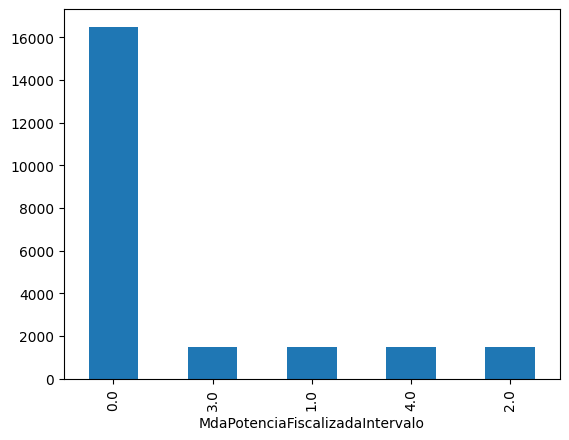

In [ ]:
from pprint import pprint
sub_frame_faixas_discrete[classes_faixa_dic['MdaPotenciaFiscalizadaKw']].value_counts().plot.bar()
sub_frame_faixas_discrete.describe()
sub_frame_faixas_discrete.info()
pprint(classe_faixas[classes_faixa_dic['MdaPotenciaFiscalizadaKw']])

In [ ]:
#consolidado = pd.concat([sub_frame_datas, sub_frame_categorias, sub_frame_faixas_discrete], axis=1)

In [ ]:
consolidado = pd.concat([sub_frame_datas, sub_frame_categorias, sub_frame_faixas_discrete], axis=1)

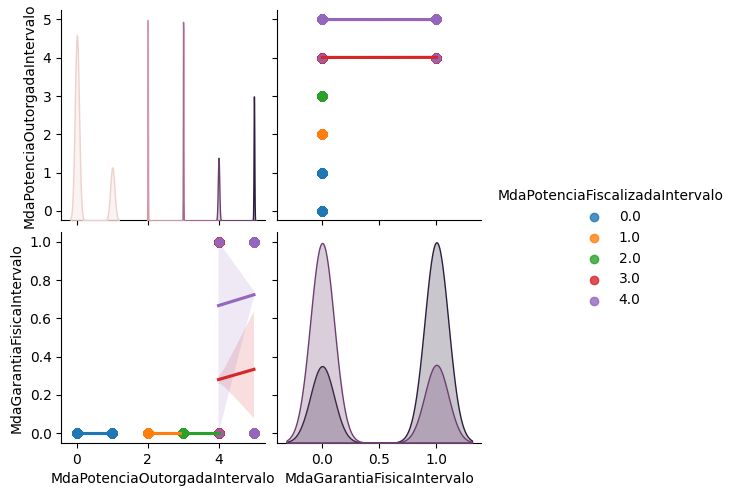

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from os import ST_NOSUID
from seaborn import pairplot
data_for_pairplot = sub_frame_faixas_discrete
#sns.pairplot(data_for_pairplot, hue='label', kind='reg', diag_kind='kde')
sns.pairplot(data_for_pairplot, hue='MdaPotenciaFiscalizadaIntervalo', kind='reg', diag_kind='kde')
# Apresentar gráfico (sns pair plot) mostrando as relações entre as variáveis independentes e a dependente (vendas).
#pairplot(data_for_pairplot, x_vars=X_train.columns[0:3] , y_vars='label', height=7, aspect=0.7, kind='reg')
plt.show()

In [ ]:
consolidado[data_cols].dtypes

,0
DatGeracaoConjuntoDados,datetime64[ns]
DatEntradaOperacao,datetime64[ns]
DatFimVigencia,datetime64[ns]
DatInicioVigencia,datetime64[ns]


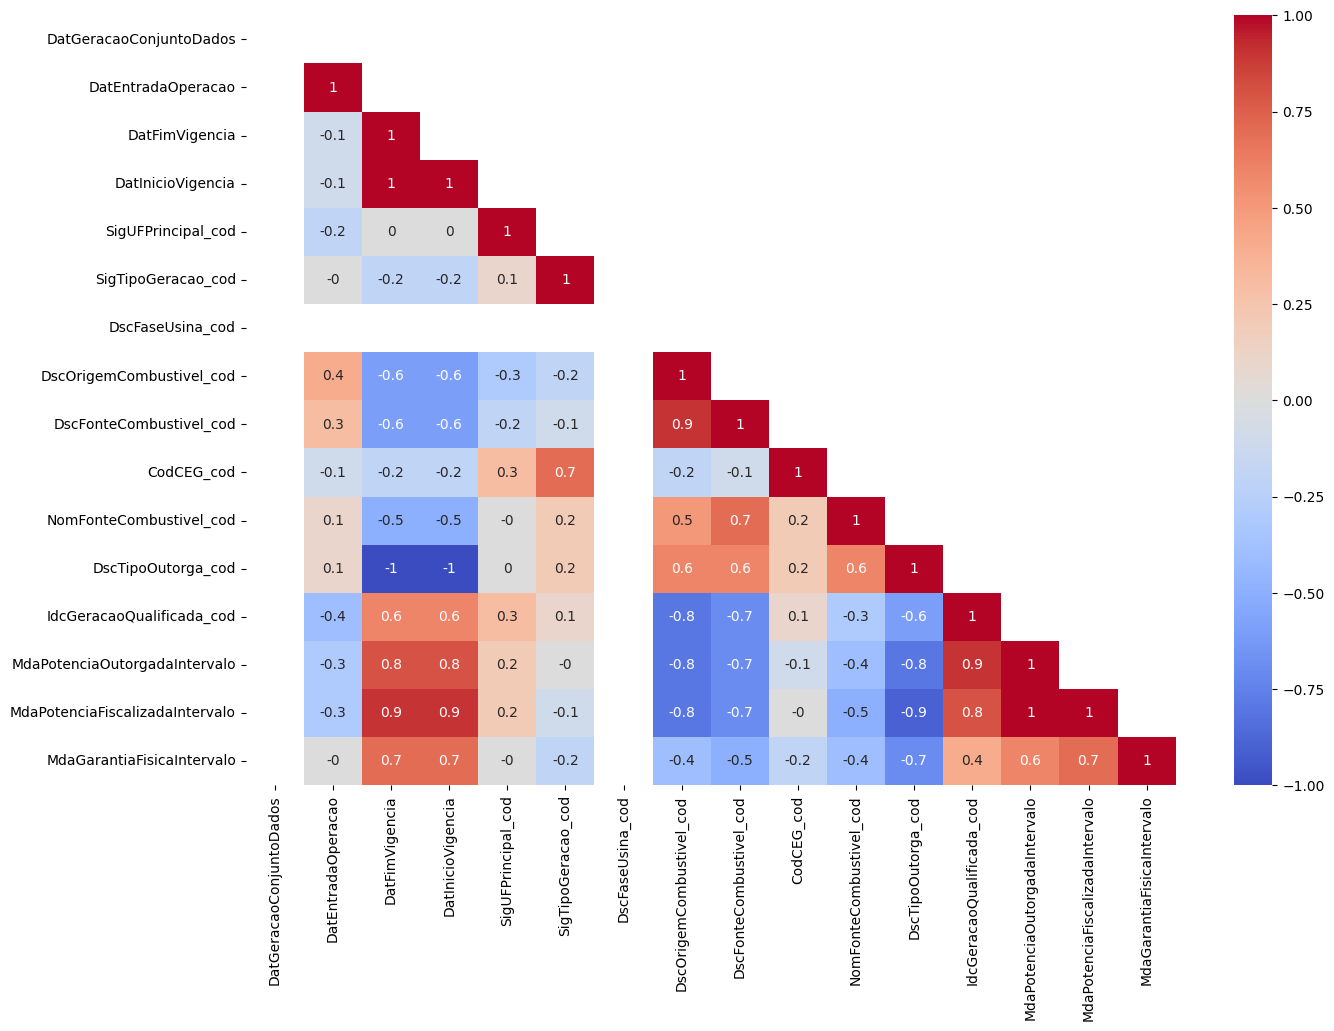

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
nconsolidado = consolidado.copy()
nconsolidado[sub_frame_categorias.columns ] = sub_frame_categorias.apply(lambda x: x.astype('category').cat.codes)
df_features = nconsolidado
mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)
plt.figure(figsize=(15,10))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [ ]:
filtrar_categorias = [i + '_cod' for i in ['SigUFPrincipal','SigTipoGeracao','DscOrigemCombustivel','CodCEG']]
#''DscOrigemCombustivel','DscFaseUsina',
filtrar_data_cols = [ 'DatEntradaOperacao','DatFimVigencia']

In [ ]:
consolidado = pd.concat([sub_frame_datas[filtrar_data_cols], sub_frame_categorias[filtrar_categorias], sub_frame_faixas_discrete], axis=1)
sub_frame_categorias = consolidado[filtrar_categorias]

In [ ]:
consolidado

,DatEntradaOperacao,DatFimVigencia,SigUFPrincipal_cod,SigTipoGeracao_cod,DscOrigemCombustivel_cod,CodCEG_cod,MdaPotenciaOutorgadaIntervalo,MdaPotenciaFiscalizadaIntervalo,MdaGarantiaFisicaIntervalo
0,1953-11-20,2030-07-07,MG,PCH,Hídrica,PCH.PH.MG.000008-6.1,3.0,2.0,0.0
1,1953-11-20,2030-07-07,MG,PCH,Hídrica,PCH.PH.MG.000009-4.1,3.0,2.0,0.0
2,1937-01-01,2030-08-31,MG,PCH,Hídrica,PCH.PH.MG.000010-8.1,3.0,2.0,0.0
3,2008-12-25,2039-11-13,RS,UHE,Hídrica,UHE.PH.RS.000012-4.1,5.0,4.0,1.0
4,2000-10-15,NaT,RS,CGH,Hídrica,CGH.PH.RS.000015-9.1,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
22493,2024-12-01,NaT,SC,UFV,Solar,UFV.RS.SC.075597-4.1,2.0,1.0,0.0
22494,2024-12-01,NaT,SC,UFV,Solar,UFV.RS.SC.075598-2.1,2.0,1.0,0.0
22495,2024-03-01,NaT,ES,UFV,Solar,UFV.RS.ES.075602-4.1,1.0,0.0,0.0
22496,2020-08-01,NaT,AM,UFV,Solar,UFV.RS.AM.075603-2.1,2.0,1.0,0.0


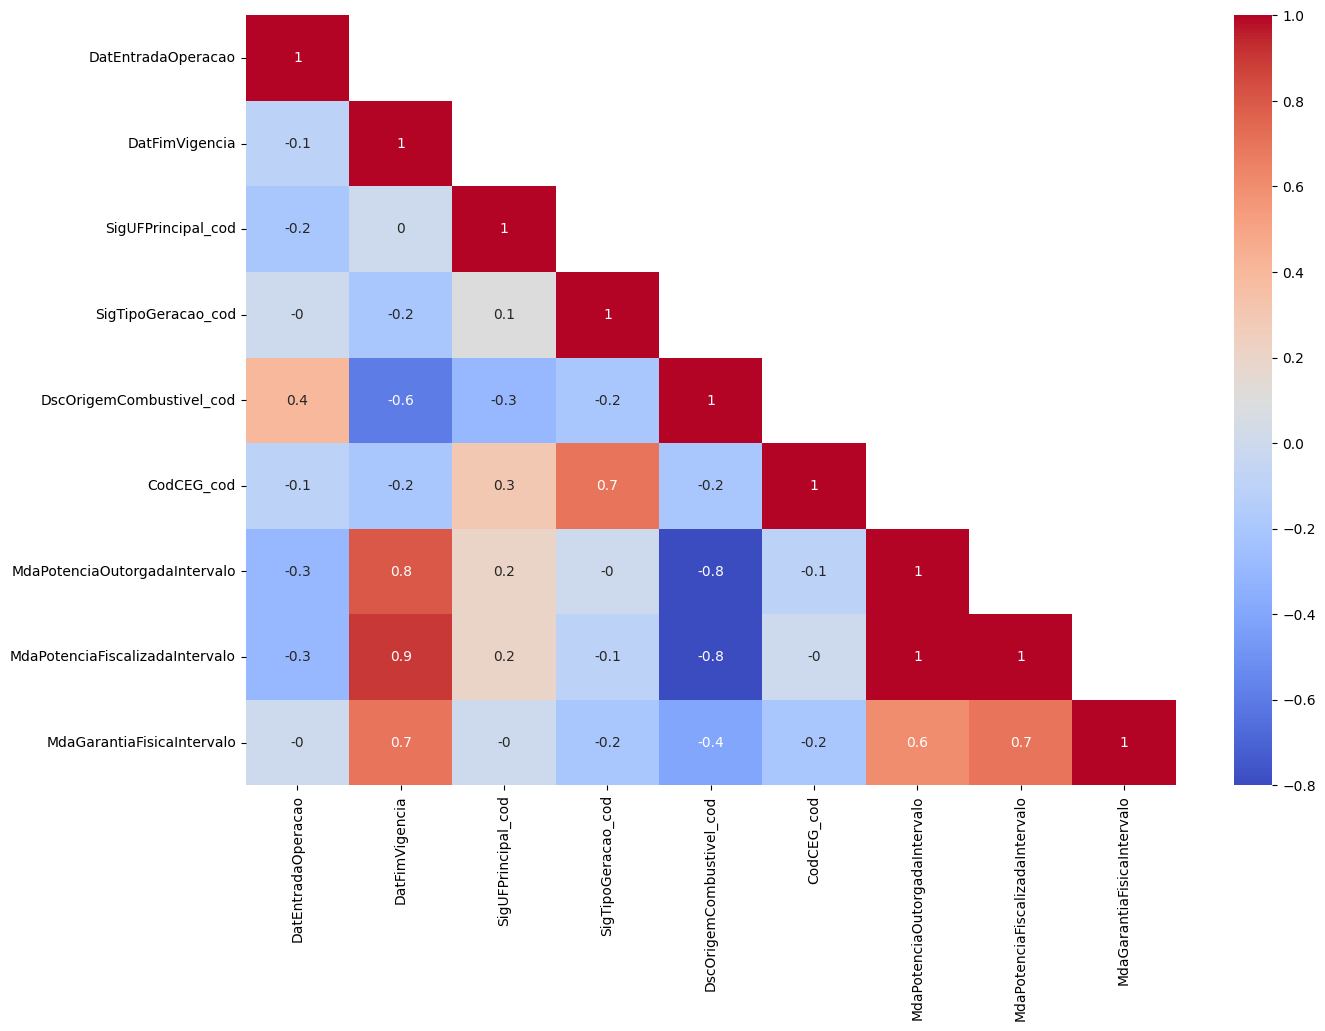

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
nconsolidado = consolidado.copy()
nconsolidado[sub_frame_categorias.columns ] = sub_frame_categorias.apply(lambda x: x.astype('category').cat.codes)
df_features = nconsolidado
mask = np.triu(np.ones_like(df_features.corr(), dtype=bool), k=1)
plt.figure(figsize=(15,10))
sns.heatmap(df_features.corr().round(1), annot=True, cmap='coolwarm', mask=mask)
plt.show()

In [ ]:
lconsolidado = pd.concat([consolidado,aneeldf['DscFonteCombustivel']], axis=1)

In [ ]:
port_tipo = lconsolidado.groupby(lconsolidado.DscFonteCombustivel)

In [ ]:
port_tipo.head(15)


,DatEntradaOperacao,DatFimVigencia,SigUFPrincipal_cod,SigTipoGeracao_cod,DscOrigemCombustivel_cod,CodCEG_cod,MdaPotenciaOutorgadaIntervalo,MdaPotenciaFiscalizadaIntervalo,MdaGarantiaFisicaIntervalo,DscFonteCombustivel
0,1953-11-20,2030-07-07,MG,PCH,Hídrica,PCH.PH.MG.000008-6.1,3.0,2.0,0.0,Potencial hidráulico
1,1953-11-20,2030-07-07,MG,PCH,Hídrica,PCH.PH.MG.000009-4.1,3.0,2.0,0.0,Potencial hidráulico
2,1937-01-01,2030-08-31,MG,PCH,Hídrica,PCH.PH.MG.000010-8.1,3.0,2.0,0.0,Potencial hidráulico
3,2008-12-25,2039-11-13,RS,UHE,Hídrica,UHE.PH.RS.000012-4.1,5.0,4.0,1.0,Potencial hidráulico
4,2000-10-15,NaT,RS,CGH,Hídrica,CGH.PH.RS.000015-9.1,2.0,1.0,0.0,Potencial hidráulico
...,...,...,...,...,...,...,...,...,...,...
7977,2022-11-24,2054-08-09,RR,UTE,Biomassa,UTE.BL.RR.044588-6.1,4.0,3.0,0.0,Biocombustíveis líquidos
9602,2020-10-01,NaT,PR,UTE,Biomassa,UTE.RA.PR.049660-0.1,3.0,2.0,0.0,Resíduos animais
9906,2025-06-03,2056-11-12,PA,UTE,Biomassa,UTE.BL.PA.051439-0.1,2.0,1.0,0.0,Biocombustíveis líquidos
9907,2022-03-12,2056-09-13,RO,UTE,Biomassa,UTE.BL.RO.051444-6.1,2.0,1.0,0.0,Biocombustíveis líquidos


In [ ]:
regioes_brasil = {
    "Norte": ["AC", "AP", "AM", "PA", "RO", "RR", "TO"],
    "Nordeste": ["AL", "BA", "CE", "MA", "PB", "PE", "PI", "RN", "SE"],
    "Centro-Oeste": ["DF", "GO", "MT", "MS"],
    "Sudeste": ["ES", "MG", "RJ", "SP"],
    "Sul": ["PR", "RS", "SC"]
}
fontes_energia = {
    'Hídrica': ['Renovável', 'Alto Impacto'],
    'Fóssil': ['Não Renovável', 'Alto Impacto'],
    'Biomassa': ['Renovável', 'Médio Impacto'],
    'Nuclear': ['Não Renovável', 'Alto Impacto'],
    'Eólica': ['Renovável', 'Baixo Impacto'],
    'Solar': ['Renovável', 'Baixo Impacto']
}

In [ ]:
regioes_brasil = {i:k for k,o in regioes_brasil.items() for i in o }
regioes_ser = aneeldf['SigUFPrincipal'].map(regioes_brasil)

In [ ]:
impactodf =   pd.DataFrame([
        [fonte, dados[0], dados[1]]
        for fonte, dados in fontes_energia.items()
    ], columns=['Fonte_Energia', 'Renovabilidade', 'Impacto_Ambiental'])

In [ ]:
impactodf

,Fonte_Energia,Renovabilidade,Impacto_Ambiental
0,Hídrica,Renovável,Alto Impacto
1,Fóssil,Não Renovável,Alto Impacto
2,Biomassa,Renovável,Médio Impacto
3,Nuclear,Não Renovável,Alto Impacto
4,Eólica,Renovável,Baixo Impacto
5,Solar,Renovável,Baixo Impacto


In [ ]:
regioes_ser = aneeldf['SigUFPrincipal'].map(regioes_brasil)
regioes_ser = regioes_ser.rename('Regiao')

In [ ]:
tipos_energia = aneeldf[['DscOrigemCombustivel']].merge(impactodf, left_on='DscOrigemCombustivel', right_on='Fonte_Energia').drop('DscOrigemCombustivel', axis=1)

In [ ]:
tipos_energia

,Fonte_Energia,Renovabilidade,Impacto_Ambiental
0,Hídrica,Renovável,Alto Impacto
1,Hídrica,Renovável,Alto Impacto
2,Hídrica,Renovável,Alto Impacto
3,Hídrica,Renovável,Alto Impacto
4,Hídrica,Renovável,Alto Impacto
...,...,...,...
22493,Solar,Renovável,Baixo Impacto
22494,Solar,Renovável,Baixo Impacto
22495,Solar,Renovável,Baixo Impacto
22496,Solar,Renovável,Baixo Impacto


In [ ]:
aneeldf[faixas]

,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw
0,1400000,1400000,0
1,3972000,3972000,0
2,1440000,1440000,0
3,100000000,100000000,45200000
4,720000,720000,510000
...,...,...,...
22493,380000,380000,0
22494,350000,350000,0
22495,75000,75000,0
22496,300000,300000,0


In [ ]:
performance = aneelfaixas_sem_na.apply(lambda x: 'acima_esperado' if (x.MdaPotenciaFiscalizadaKw - x.MdaPotenciaOutorgadaKw ) > (x.MdaPotenciaOutorgadaKw / 4) else 'abaixo_esperado' if (x.MdaPotenciaOutorgadaKw - x.MdaPotenciaFiscalizadaKw  ) > (x.MdaPotenciaOutorgadaKw / 4) else 'dentro_esperado' , axis=1)
performancex = aneelfaixas_sem_na.assign(desempenho=performance)

In [ ]:
super_consolidado = pd.concat([consolidado,regioes_ser,tipos_energia[['Renovabilidade', 'Impacto_Ambiental']],aneeldf[['NomEmpreendimento','DscMuninicpios']],performancex], axis=1)

In [ ]:
performancex.loc[performance != 'dentro_esperado']

,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,desempenho
39,7670000,4670000,0,abaixo_esperado
43,900000,455000,0,abaixo_esperado
70,17620000,11120000,9900000,abaixo_esperado
118,138172000,50500000,0,abaixo_esperado
126,96795000,63000000,7500000,abaixo_esperado
...,...,...,...,...
22136,1380,1000,0,abaixo_esperado
22137,1380,1000,0,abaixo_esperado
22138,1380,1000,0,abaixo_esperado
22139,1380,1000,0,abaixo_esperado


#Salvando o dataframe em dois formatos um csv e outro pkl binario

## dataframe para csv

In [ ]:
#pd.sub aneelfaixas_sem_na.MdaPotenciaFiscalizadaKw - aneelfaixas_sem_na.MdaPotenciaOutorgadaKw
super_consolidado.to_csv('consolidado.csv', sep=';', quotechar='"'  ,index=False)

In [ ]:
cconsolidado = pd.read_csv('consolidado.csv', sep=';', quotechar='"')

### Mostra que o csv nao preserva os types

In [ ]:
cconsolidado.dtypes

,0
DatEntradaOperacao,object
DatFimVigencia,object
SigUFPrincipal_cod,object
SigTipoGeracao_cod,object
DscOrigemCombustivel_cod,object
CodCEG_cod,object
MdaPotenciaOutorgadaIntervalo,float64
MdaPotenciaFiscalizadaIntervalo,float64
MdaGarantiaFisicaIntervalo,float64
Regiao,object


## dataframe to pkl

In [ ]:
joblib.dump(super_consolidado, 'consolidado.pkl')

['consolidado.pkl']

In [ ]:
dconsolidado = joblib.load('consolidado.pkl')

### Mostra que o pkl mantes os types

In [ ]:
dconsolidado.dtypes

,0
DatEntradaOperacao,datetime64[ns]
DatFimVigencia,datetime64[ns]
SigUFPrincipal_cod,category
SigTipoGeracao_cod,category
DscOrigemCombustivel_cod,category
CodCEG_cod,category
MdaPotenciaOutorgadaIntervalo,float64
MdaPotenciaFiscalizadaIntervalo,float64
MdaGarantiaFisicaIntervalo,float64
Regiao,object


#Graficos e Avaliacao dos resultados

o gráfico mostra a distribuição do projetos de forma que, quantitativamente, se sobressai a região norte

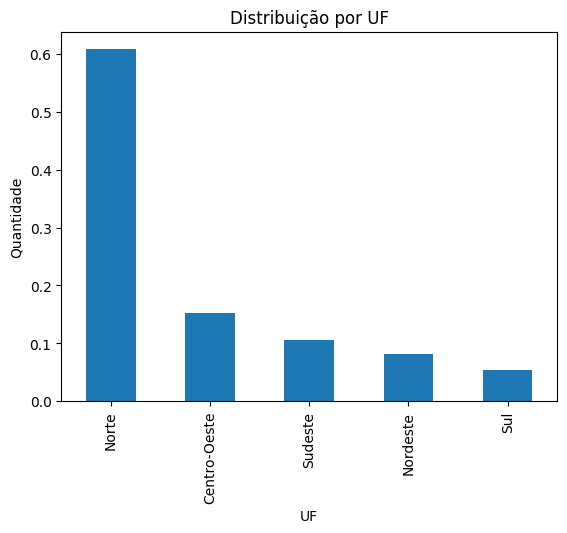

In [ ]:
# Distribuição por UF
dconsolidado['Regiao'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribuição por UF')
plt.xlabel('UF')
plt.ylabel('Quantidade')
plt.show()

<Axes: xlabel='Regiao'>

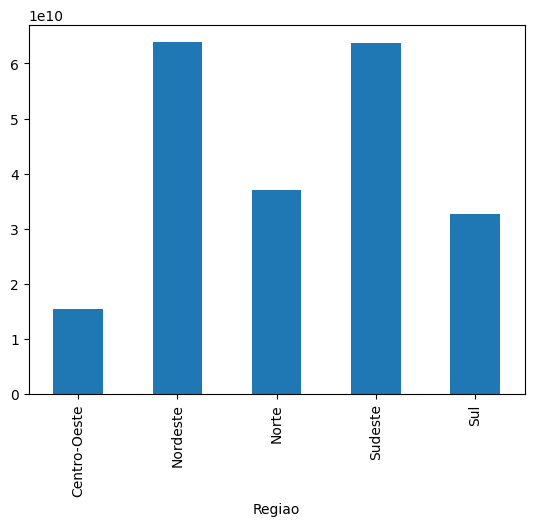

In [ ]:
dconsolidado.groupby('Regiao')['MdaPotenciaFiscalizadaKw'].sum().plot(kind='bar')

gráfico comparativo que mostra que apesar do norte e centro-oeste serem predominantes no número de empreendimentos eles não tem o mesmo protagonismo na geraçao d e energia (ou seja projetos menores mas mais frequentes)

In [ ]:
dconsolidado.groupby('Regiao')['MdaPotenciaFiscalizadaKw'].sum()

,MdaPotenciaFiscalizadaKw
Regiao,
Centro-Oeste,15493143000
Nordeste,63853121000
Norte,36988918000
Sudeste,63726237000
Sul,32671343000


<Axes: xlabel='DscOrigemCombustivel_cod'>

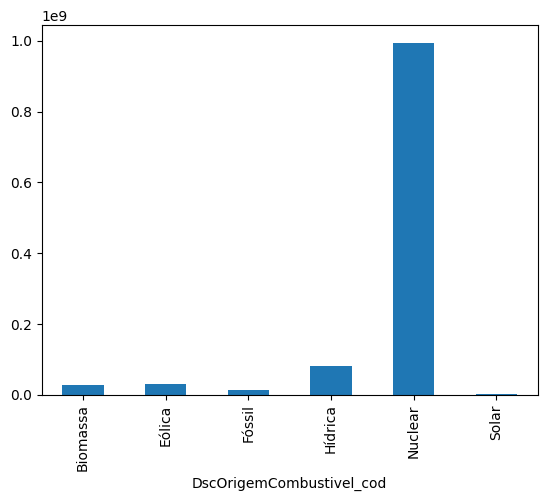

In [ ]:
dconsolidado.groupby('DscOrigemCombustivel_cod')['MdaPotenciaFiscalizadaKw'].mean().plot(kind='bar') ## média por usina
#dconsolidado.groupby('DscOrigemCombustivel_cod')['MdaPotenciaFiscalizadaKw'].sum() ## soma por tipo de combustivel


<Axes: xlabel='DscOrigemCombustivel_cod'>

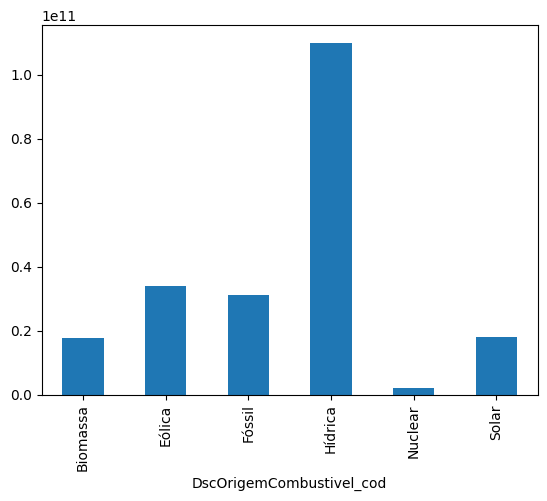

In [ ]:
dconsolidado.groupby('DscOrigemCombustivel_cod')['MdaPotenciaFiscalizadaKw'].sum().plot(kind='bar') #

gráfico demonstra que apesar da maior parte da energia ser gerada por uso de hidro eletricas os projetos núcleares sao mais eficientes

##Gráficos consolidados de geração

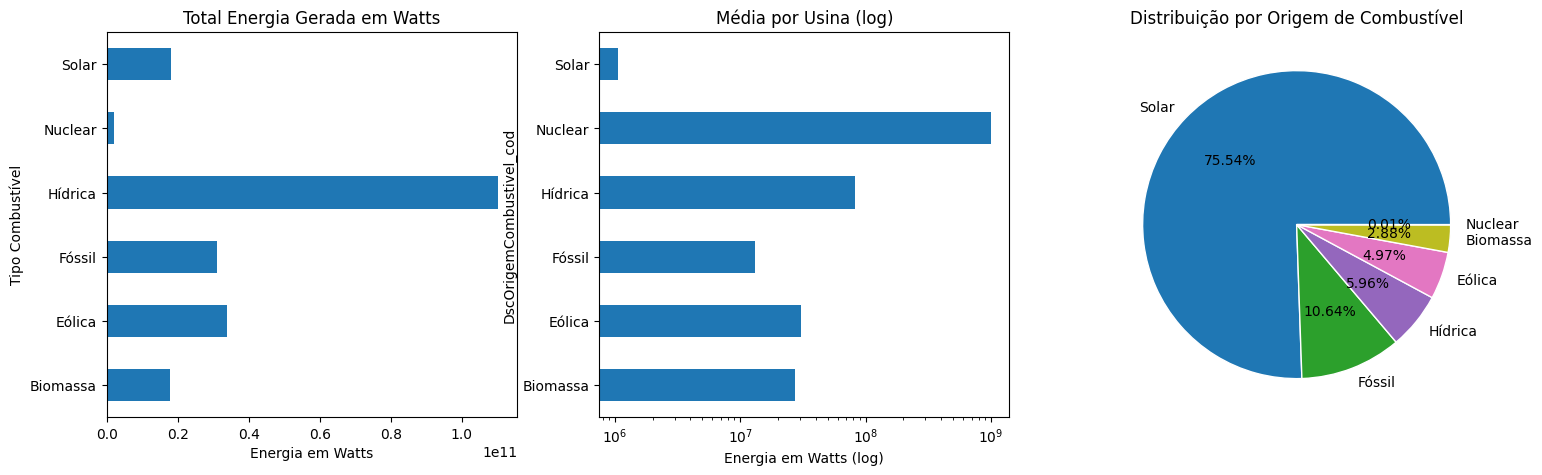

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 5))

# Total gerado por tipo combustivel
# MdaPotenciaFiscalizadaKw
# DscOrigemCombustivel
#aneeldf.head(2)
total_gerado_por_tipo_df = dconsolidado.groupby('DscOrigemCombustivel_cod')['MdaPotenciaFiscalizadaKw'].sum()
total_gerado_por_tipo_df.plot(kind='barh', ax=axes[0])
axes[0].set_title('Total Energia Gerada em Watts')
axes[0].set_xlabel('Energia em Watts')
axes[0].set_ylabel('Tipo Combustível')

# média por TIPO combustivel
media_gerado_por_tipo_df = dconsolidado.groupby('DscOrigemCombustivel_cod')['MdaPotenciaFiscalizadaKw'].mean()
media_gerado_por_tipo_df.plot(kind='barh', ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Média por Usina (log)')
axes[1].set_xlabel('Energia em Watts (log)')

# quantidade total de usinas por tipo
total_usina_por_tipo = dconsolidado['DscOrigemCombustivel_cod'].value_counts()
colors = plt.get_cmap('tab20')(np.linspace(0, 1, len(total_usina_por_tipo)))

axes[2].pie(
    total_usina_por_tipo,
    labels=total_usina_por_tipo.index,
    autopct='%1.2f%%',
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"}
)
axes[2].set_title("Distribuição por Origem de Combustível")

plt.show()

In [ ]:
contagem = dconsolidado.groupby(['desempenho', 'DscOrigemCombustivel_cod'])
#l =dconsolidado.groupby('desempenho').groupby('DscOrigemCombustivel_cod').value_counts().plot(kind='bar')

##Quantidade de falha de entrega por tipo de combustivel

<Axes: xlabel='DscOrigemCombustivel_cod'>

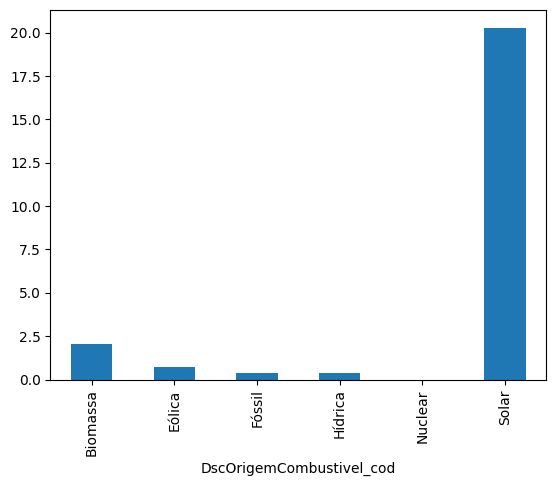

In [ ]:
((contagem.size().abaixo_esperado / (contagem.size().dentro_esperado )) * 100).plot(kind='bar')

In [ ]:
aneeldf['DscFaseUsina'] != 'Operação'

,DscFaseUsina
0,False
1,False
2,False
3,False
4,False
...,...
22493,False
22494,False
22495,False
22496,False


DscOrigemCombustivel_cod  Biomassa  Eólica  Fóssil  Hídrica  Nuclear  Solar
Regiao                                                                     
Centro-Oeste                   106       0     153      228        0   2924
Nordeste                        68    1012     312       56        0    390
Norte                           34       0     423       83        0  13141
Sudeste                        331       3    1242      445        2    343
Sul                            110     103     263      528        0    198


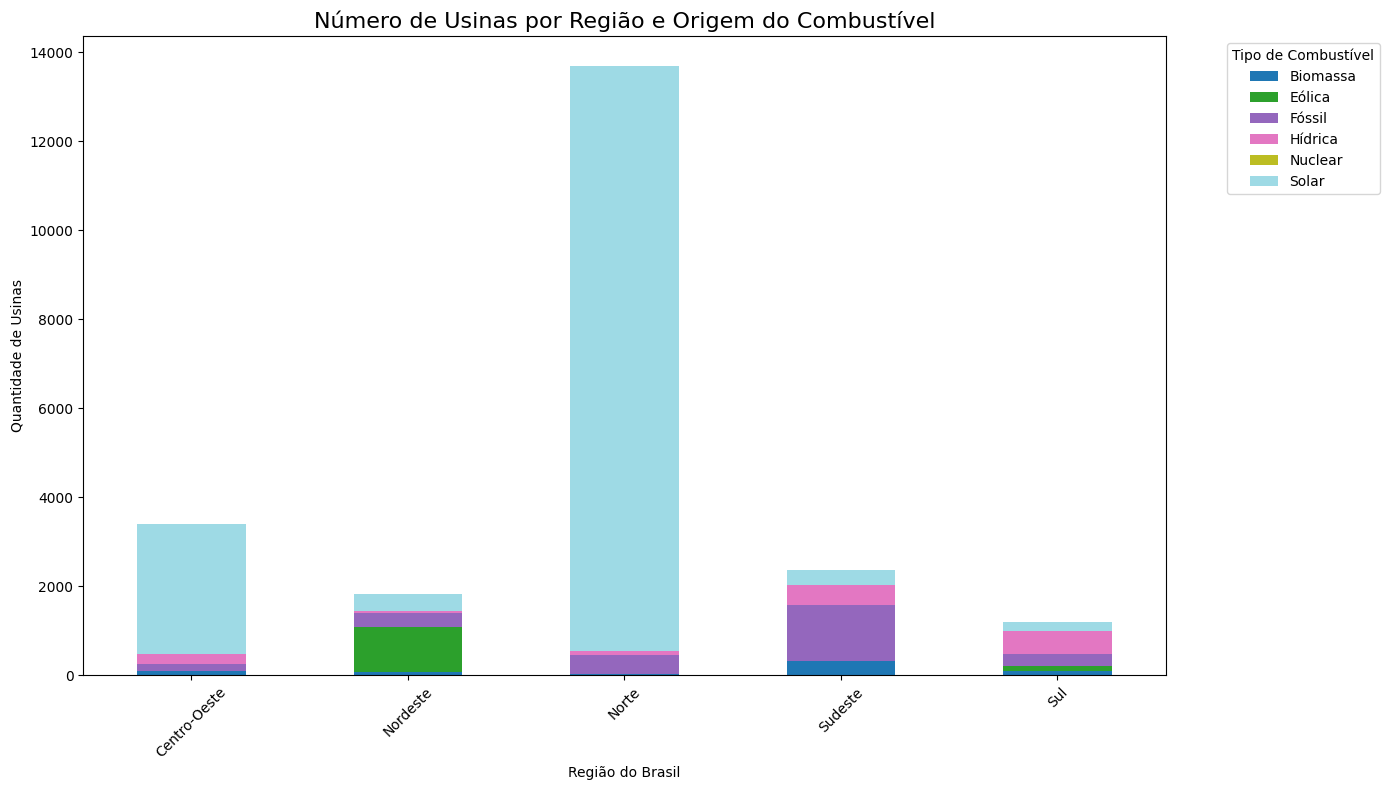

In [ ]:
#aneeldf['DscFaseUsina'] != 'Operação'

dados_para_grafico = dconsolidado.groupby(['Regiao', 'DscOrigemCombustivel_cod'])\
                            .size()\
                            .unstack(fill_value=0)

print(dados_para_grafico)

#dconsolidado.head(2)

ax = dados_para_grafico.plot(
    kind='bar',
    stacked=True,          # Gráfico de barras empilhadas
    figsize=(14, 8),
    cmap='tab20'           # Paleta de cores
)

ax.set_title('Número de Usinas por Região e Origem do Combustível', fontsize=16)
ax.set_ylabel('Quantidade de Usinas')
ax.set_xlabel('Região do Brasil')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Combustível', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

# **Geração de conhecimento**

1) **Como explicar que apesar do maior número de empreendimentos recentes ser na região Norte e de matriz solar, os gráficos mostram que a maior potência aferida é da matriz hídrica e das regiões Sul/Sudeste ?**

Com base nos gráficos e nos dados apresentados mostram  que a região Norte aparece com o maior número de projetos para geração de energia elétrica.
no gráfico **"Distribuição por UF"**

No entanto, quando olhamos para a quantidade total de energia fiscalizada, que são os gráficos **"Total Energia Gerada em Watts"** percebemos que as regiões Nordeste e Sudeste seguidas pelo Sul se destacam e só depois a região  Norte.

Então, em resumo: embora o *Norte tenha mais projetos novos*, *a maior parte da energia fiscalizada vem do Sudeste e Nordeste, e as fontes hídrica e fóssil* são as que mais contribuem para a energia total, mesmo que a Atualizamos as entregas dentro do período disponível seja a mais potente usina individualmente.





2)**Por que o potencial apresentado  à fonte solar é o que mais varia, entregando abaixo do esperado?**

Com base nos dados, a fonte solar varia mais e entrega abaixo do esperado porque:

**Muitos projetos pequenos**: Há uma grande quantidade de projetos solares, muitos de menor porte, o que naturalmente introduz mais variação nos dados gerais.

**Sensibilidade ao clima**: A geração solar depende muito do tempo (sol, nuvens, etc.), causando flutuações na entrega de energia.

**Maior frequência de "abaixo do esperado"**: Os dados mostram que a energia solar tem a maior proporção de projetos que não atingem a potência esperada na prática.






3)**Por que o tipo de empreendimento que mais entrega energia por usina única é o nuclear e o que menos entrega é o solar? Isso poderia estar relacionado ao grande número de empreendimentos solares com diferentes potências nominais?**

O gráfico **"Média por Usina (log)"** (célula xXCS28clHyA0, o do meio) mostra claramente que a **energia nuclear** tem a maior média de potência fiscalizada por usina, enquanto a **solar** tem a menor média.

**Por que isso acontece ?**

**Natureza da tecnologia:** Usinas nucleares são, por natureza, projetos de mega escala. Elas são construídas para gerar enormes quantidades de energia a partir de um único local. São complexas, caras e projetadas para operar continuamente com alta capacidade. Por isso, a média de energia por usina é altíssima.

**Energia solar e a escala dos projetos:** A energia solar, especialmente no Brasil (como vimos no gráfico de pizza, onde a solar é a fonte com mais projetos), inclui uma vasta gama de empreendimentos. Temos desde grandes parques solares (usinas centralizadas) até muitos projetos de menor porte, como painéis em telhados de casas e empresas (geração distribuída).


